**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

**Connecting dataset**

In [ ]:
!gdown "https://drive.google.com/uc?id=17O_cLrK9HrR43yz1CdT8ZKA6_ILN206N"

Downloading...
From: https://drive.google.com/uc?id=17O_cLrK9HrR43yz1CdT8ZKA6_ILN206N
To: /content/Strooptest.csv
100% 458/458 [00:00<00:00, 1.51MB/s]


In [ ]:
df = pd.read_csv("Strooptest.csv")
print(df.head())

   Sample ID  Score (/100)  Accuracy (%)  Avg. Reaction (s) Correct Answers
0          1            99          98.5               1.32         135/137
1          2            99          99.3               1.25         136/137
2          3            97          97.8               1.40         134/137
3          4           100         100.0               1.30         137/137
4          5            96          97.1               1.45         133/137


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sample ID          16 non-null     int64  
 1   Score (/100)       16 non-null     int64  
 2   Accuracy (%)       16 non-null     float64
 3   Avg. Reaction (s)  16 non-null     float64
 4   Correct Answers    16 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 772.0+ bytes
None


**Data Preprocessing**

Feature Selection

In [ ]:
features_df = df[['Score (/100)', 'Accuracy (%)', 'Avg. Reaction (s)']]

Feature Scaling

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

**Optimal Number of Clusters (Elbow Method)**

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

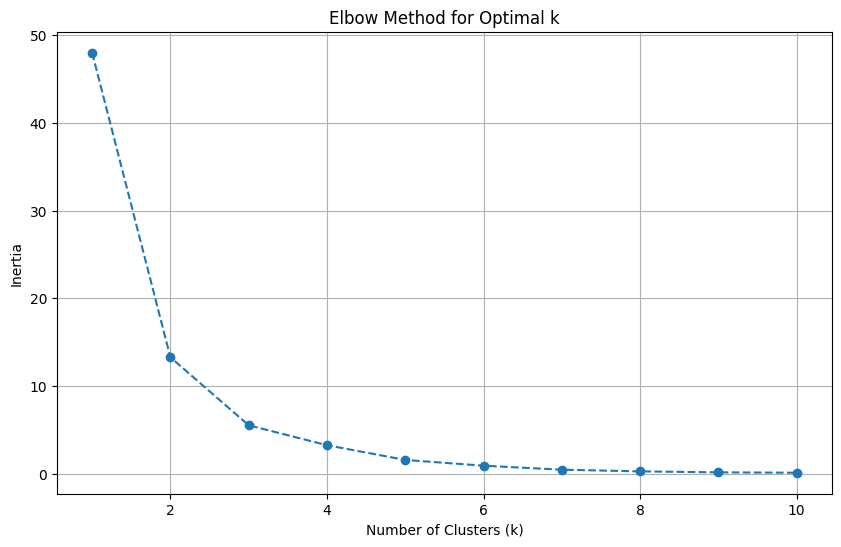

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**K-Means Clustering**

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [ ]:
df['KMeans_Label'] = kmeans_labels

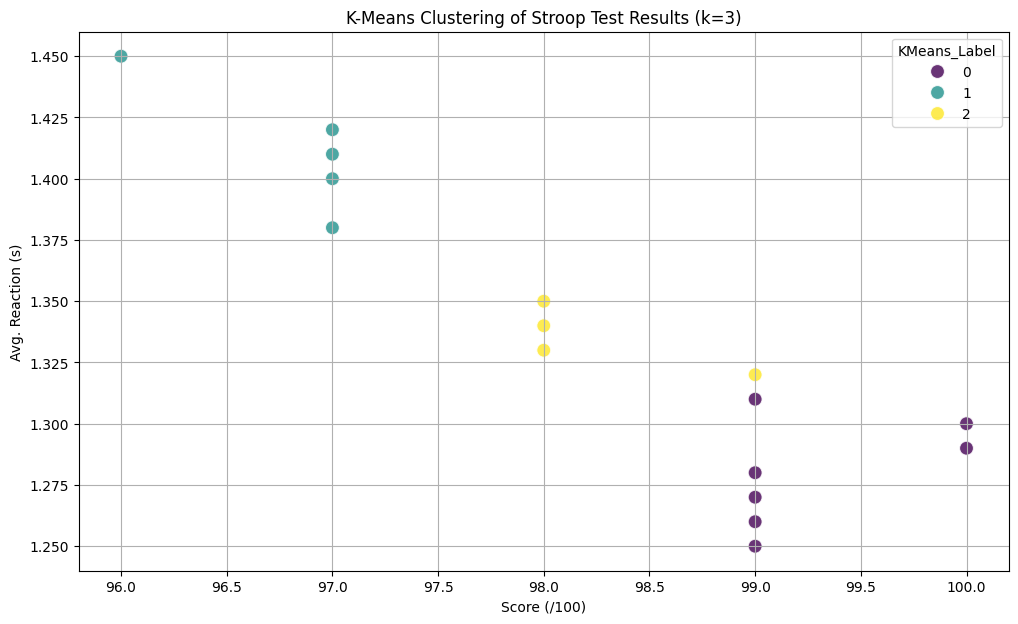

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Score (/100)', y='Avg. Reaction (s)', hue='KMeans_Label', palette='viridis', s=100, alpha=0.8)
plt.title('K-Means Clustering of Stroop Test Results (k=3)')
plt.grid(True)
plt.show()

In [ ]:
print("K-Means Clustering Results")
print(df[['Score (/100)', 'Avg. Reaction (s)', 'KMeans_Label']].head())
print("\n")

K-Means Clustering Results
   Score (/100)  Avg. Reaction (s)  KMeans_Label
0            99               1.32             2
1            99               1.25             0
2            97               1.40             1
3           100               1.30             0
4            96               1.45             1




Data Splitting 70% training and 30% testing

In [ ]:
X = scaled_features
y = df['KMeans_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Support Vector Machine (SVM)**

In [ ]:
print("Support Vector Machine (SVM)")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm * 100:.2f}%")


Support Vector Machine (SVM)
SVM Model Accuracy: 100.00%


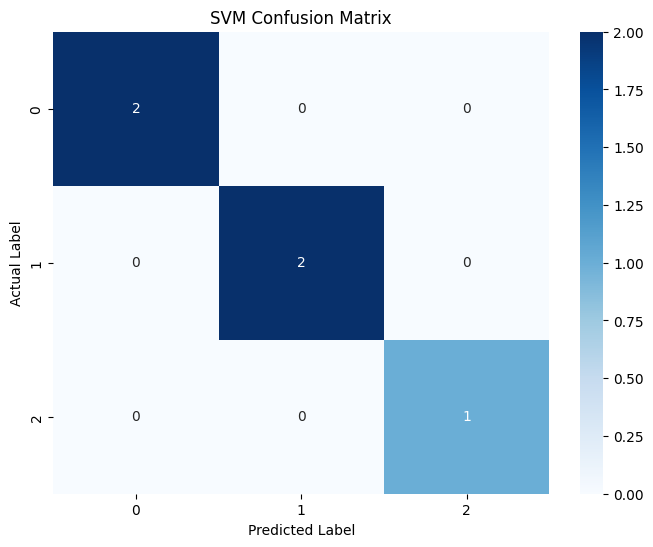

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Decision Tree**

In [ ]:
print("Decision Tree")
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

Decision Tree


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt * 100:.2f}%")


Decision Tree Model Accuracy: 100.00%


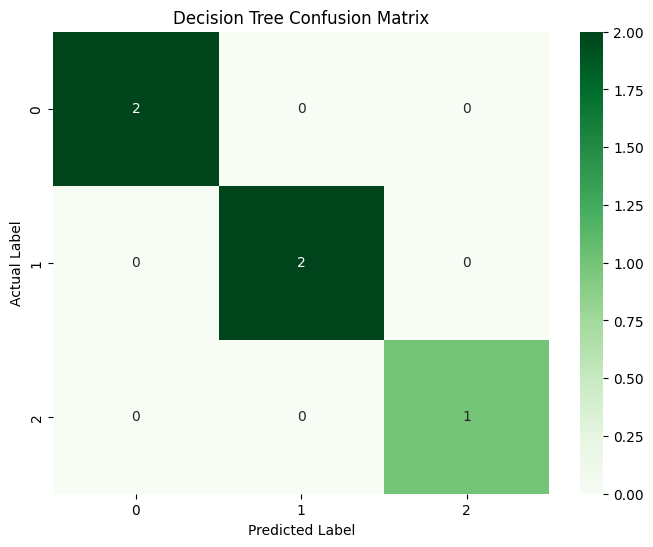

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

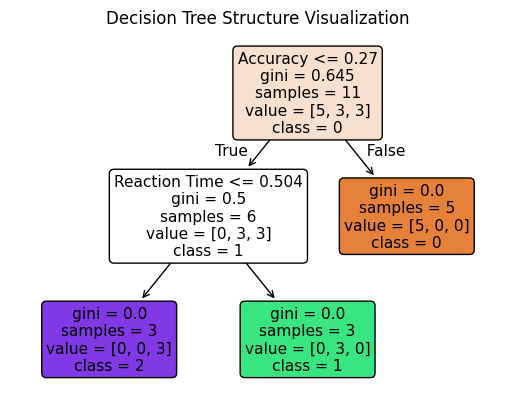

In [ ]:
plot_tree(dt_model,
          feature_names=['Score', 'Accuracy', 'Reaction Time'],
          class_names=[str(i) for i in np.unique(y)],
          filled=True,
          rounded=True)
plt.title("Decision Tree Structure Visualization")
plt.show()